# Experiments

In this notebook we perform different ways to encode the concepts' features based on *Rank_PF*, *Disting*, and *Intercorr_str_tax*. 
This notebooks uses the MEN dataset... 

## Header

Libraries and additional programs

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import random
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr

%matplotlib inline

pathh = '../Data/' 
exp_file = '../Data/ExperimentalResults.xlsx'   

%run EncodingDataset.ipynb

## SimLex-999 dataset

_SimLex-999 is a gold standard resource for the evaluation of models that learn the meaning of words and concepts. 
SimLex-999 provides a way of measuring how well models capture similarity, rather than relatedness or association. The scores in SimLex-999 therefore differ from other well-known evaluation datasets such as WordSim-353. Example:_

**coast - shore**   9.000 (SimLex-999 rating)    9.1 (WordSim-353 rating)

**clothes - closet**  1.96 (SimLex-999 rating)   9.1 (WordSim-353 rating)

_More information: https://fh295.github.io/simlex.html_

Just as with the previous dataset, first we find out how many pairs are there for which both concepts appear in the McRae dataset. 

In [47]:
def ListConcepts():
    "Read an excel file and returns a list of pairs of concepts with its similarity value (according to humans)"
    SimLex_path = "../Data/SimLex-999.txt"
    SimLex_file = open(SimLex_path, "r")
    SimLex = SimLex_file.readlines()
    SimLex = [str.split(x) for x in SimLex][1:]   # Removed first line (column's names)

    # List of all concepts in McRae dataset
    Concepts = get_concepts_list() 
    
    #We are interested in the first elements of each line (row)
    SimLexList = []
    for row in SimLex:
        if row[0] in Concepts and row[1] in Concepts and row[2] == 'N':
            SimLexList.append([row[0], row[1], float(row[3])])
    
    return sorted(SimLexList, key = lambda x: x[2])
            
def ListNames (PairConcepts):
    "Given the list of pairs of concepts. It returns a list of the concept names without repetition"
    L = set([])
    for x in PairConcepts:
        L.add(x[0])
        L.add(x[1])
    return sorted(list(L))


SimLexList = ListConcepts()

SimLex_sim = [x[2] for x in SimLexList]
SimLex_names = ListNames(SimLexList)
print SimLexList

[['car', 'hose', 0.87], ['car', 'bridge', 0.95], ['car', 'elevator', 1.03], ['mouse', 'cat', 1.12], ['box', 'cigar', 1.25], ['box', 'elevator', 1.32], ['house', 'carpet', 1.38], ['chicken', 'rice', 1.43], ['ball', 'basket', 1.67], ['dog', 'cat', 1.75], ['house', 'key', 1.9], ['bread', 'cheese', 1.95], ['door', 'cellar', 1.97], ['spoon', 'cup', 2.02], ['boat', 'anchor', 2.25], ['boat', 'car', 2.37], ['cat', 'rabbit', 2.37], ['dog', 'horse', 2.38], ['ball', 'cannon', 2.58], ['cow', 'goat', 2.93], ['horse', 'ox', 3.02], ['bed', 'bedroom', 3.4], ['bed', 'couch', 3.42], ['bed', 'chair', 3.5], ['gun', 'knife', 3.65], ['guitar', 'drum', 3.78], ['apple', 'lemon', 4.05], ['house', 'barn', 4.33], ['wall', 'brick', 4.68], ['calf', 'bull', 4.93], ['cup', 'jar', 5.13], ['plate', 'bowl', 5.23], ['door', 'gate', 5.25], ['gun', 'cannon', 5.68], ['house', 'apartment', 5.8], ['cabin', 'hut', 6.53], ['chair', 'bench', 6.67], ['sofa', 'chair', 6.67], ['cat', 'lion', 6.75], ['sweater', 'jacket', 7.15], ['c

### a) Visualizing dataset

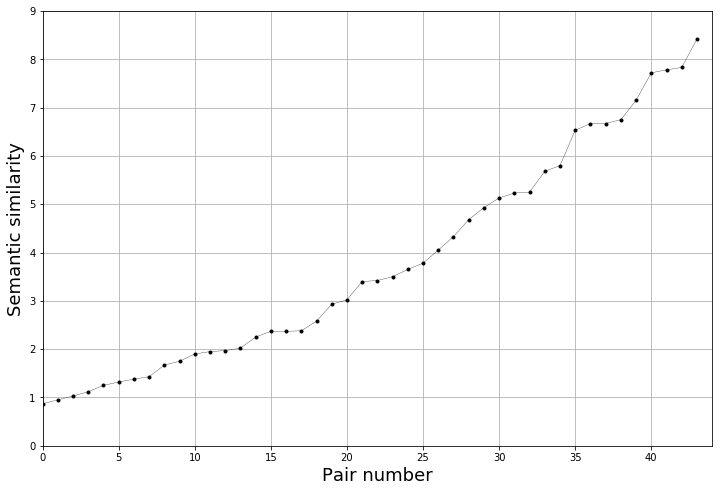

In [48]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot([x[2] for x in SimLexList], color='k', linestyle='-', marker='.', markersize=6, linewidth=.3 )  
plt.xlim((0,44))
plt.ylim((0,9))
plt.xlabel('Pair number', fontsize=18)
plt.ylabel('Semantic similarity', fontsize=18)
plt.grid(True)
plt.savefig('HumSim-SimLex.png', dpi=300)

### b) Encoding dataset

In [75]:
Init_mem('normal', 100, SimLex_names)

 Begining to encode dataset...
End of encoding


### b) Measuring similarity

In [85]:
# Create list of distances for each method
HD_SimLex = []; McRae_SimLex = []; WUP_SimLex = []; LCH_SimLex = []; RES_SimLex = []; JCN_SimLex = []

# Loop over all pairs of concepts
i = 0
print "Starting..."
for pair in SimLexList:
    print i,
    HD_SimLex.append(HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()))
    McRae_SimLex.append( McRae_simi(pair[0:2]) )
    WUP_SimLex.append(similarity_fun(wn.wup_similarity, pair[0:2]))
    LCH_SimLex.append(similarity_fun(wn.lch_similarity, pair[0:2]))
    RES_SimLex.append(similarity_fun(wn.res_similarity, pair[0:2], brown_ic))
    JCN_SimLex.append(similarity_fun(wn.jcn_similarity, pair[0:2], brown_ic))
    i += 1

#Max-min normalization to HD_sim...
max_sim = float(max(HD_SimLex)); min_sim = float(min(HD_SimLex))
HD_SimLex = map(lambda x: 1. - (float(x) - min_sim) / (max_sim - min_sim), HD_SimLex)
    
print "End"

 Starting...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 End


### c) Computing correlation

In [86]:
Pear_correlations = [['HDC', pearsonr(SimLex_sim, HD_SimLex)[0]], ['McRae', pearsonr(SimLex_sim, McRae_SimLex)[0]],
                ['wup', pearsonr(SimLex_sim, WUP_SimLex)[0]], ['lch', pearsonr(SimLex_sim, LCH_SimLex)[0]],
                ['res', pearsonr(SimLex_sim, RES_SimLex)[0]], ['jcn', pearsonr(SimLex_sim, JCN_SimLex)[0]]]

Spear_correlations = [['HDC', spearmanr(SimLex_sim, HD_SimLex)[0]], ['McRae', spearmanr(SimLex_sim, McRae_SimLex)[0]],
                ['wup', spearmanr(SimLex_sim, WUP_SimLex)[0]], ['lch', spearmanr(SimLex_sim, LCH_SimLex)[0]],
                ['res', spearmanr(SimLex_sim, RES_SimLex)[0]], ['jcn', spearmanr(SimLex_sim, JCN_SimLex)[0]]]


Pear_correlations = sorted(Pear_correlations, key = lambda x : x[1], reverse = True)
Spear_correlations = sorted(Spear_correlations, key = lambda x : x[1], reverse = True)

print Pear_correlations
print Spear_correlations

[['HDC', 0.6709370549313499], ['McRae', 0.6249538446769186], ['res', 0.5148772163908228], ['lch', 0.43627661476892626], ['wup', 0.42406723211596103], ['jcn', 0.35782780233339617]]
[['HDC', 0.6728451634160334], ['McRae', 0.6236872269863861], ['res', 0.5229768623236039], ['wup', 0.4695487204069717], ['lch', 0.4410097351419255], ['jcn', 0.3981390142486437]]


### d) Plotting

  i  c1     c2    SimLex-999 VSA Dif
[9, 'dog', 'cat', 1.75, 0.66, 0.54]
[38, 'cat', 'lion', 6.75, 0.3, 0.49]
[19, 'cow', 'goat', 2.93, 0.75, 0.48]
[3, 'mouse', 'cat', 1.12, 0.41, 0.38]
[29, 'calf', 'bull', 4.93, 0.17, 0.38]
[32, 'door', 'gate', 5.25, 0.97, 0.38]
[28, 'wall', 'brick', 4.68, 0.18, 0.33]
[35, 'cabin', 'hut', 6.53, 0.43, 0.33]
[39, 'sweater', 'jacket', 7.15, 0.52, 0.33]
[40, 'cottage', 'cabin', 7.72, 0.59, 0.33]
[26, 'apple', 'lemon', 4.05, 0.74, 0.31]
[21, 'bed', 'bedroom', 3.4, 0.04, 0.3]
[36, 'chair', 'bench', 6.67, 0.48, 0.3]
[30, 'cup', 'jar', 5.13, 0.3, 0.27]
[11, 'bread', 'cheese', 1.95, 0.39, 0.24]
[2, 'car', 'elevator', 1.03, 0.25, 0.23]
[4, 'box', 'cigar', 1.25, 0.28, 0.23]
[13, 'spoon', 'cup', 2.02, 0.34, 0.19]
[16, 'cat', 'rabbit', 2.37, 0.38, 0.18]
[18, 'ball', 'cannon', 2.58, 0.06, 0.17]
[14, 'boat', 'anchor', 2.25, 0.03, 0.15]
[17, 'dog', 'horse', 2.38, 0.35, 0.15]
[20, 'horse', 'ox', 3.02, 0.44, 0.15]
[27, 'house', 'barn', 4.33, 0.31, 0.15]
[34, 'house', '

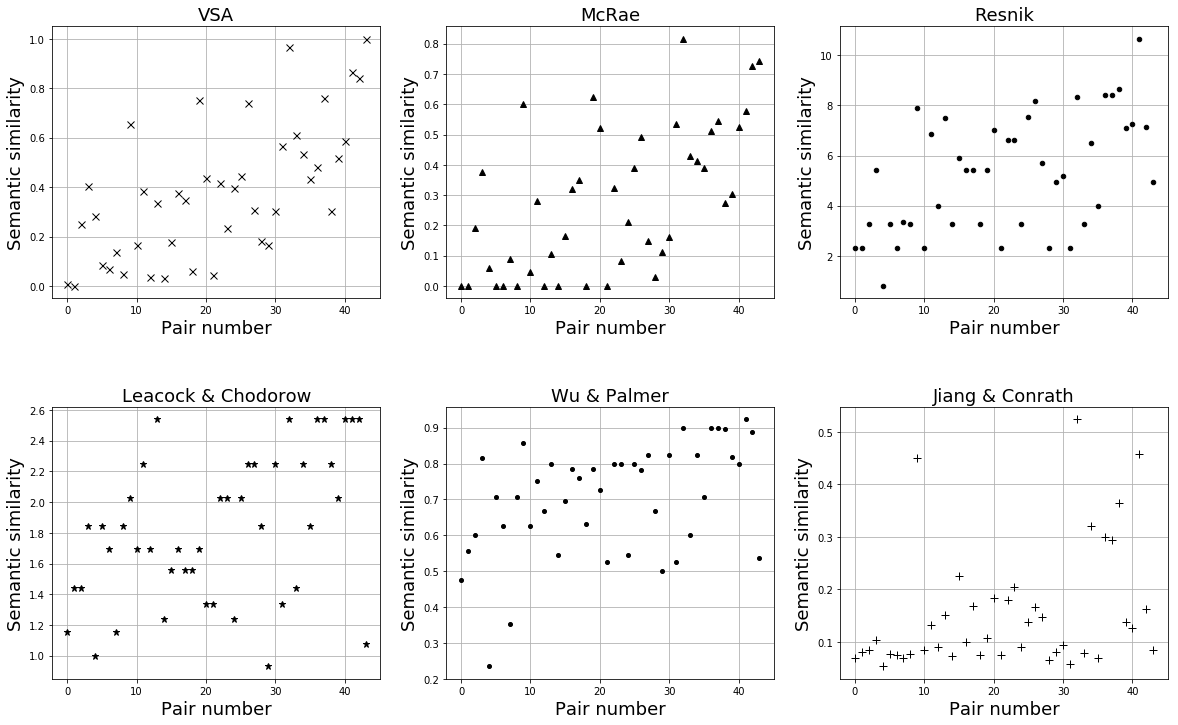

In [89]:
plt.rcParams["figure.figsize"] = [20,12]
f_size = 18
plt.subplots_adjust(hspace=0.4)

plt.subplot(231)
plt.plot(HD_SimLex, color='k', linestyle='None', marker='x', markersize=7, linewidth=1 )  
plt.title('VSA', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(232)
plt.plot(McRae_SimLex, color='k', linestyle='None', marker='^', markersize=6, linewidth=1 )  
plt.title('McRae', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)


plt.subplot(233)
plt.plot(RES_SimLex, color='k', linestyle='None', marker='.', markersize=9, linewidth=1 )  
plt.title('Resnik', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(234)
plt.plot(LCH_SimLex, color='k', linestyle='None', marker='*', markersize=7, linewidth=1 )  
plt.title('Leacock & Chodorow', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(235)
plt.plot(WUP_SimLex, color='k', linestyle='None', marker='.', markersize=8, linewidth=1 )  
plt.title('Wu & Palmer', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(236)
plt.plot(JCN_SimLex, color='k', linestyle='None', marker='+', markersize=8, linewidth=1 )  
plt.title('Jiang & Conrath', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.savefig('SubPlots-SimLex.png') #, dpi=1000)

In [102]:
# Argumento importante en discusión...
print '  i',' c1','    c2   ','SimLex-999','VSA', 'Dif'
L = []
for i in range(len(SimLexList)):
    L.append([i] + SimLexList[i] + [round(HD_SimLex[i],2)] + [abs(round((SimLexList[i][2]-.9)/7.4 - HD_SimLex[i],2))])

# Para ver parejas que menos concuerda...
#L = sorted(L, key = lambda x: x[5], reverse = True)
L = sorted(L, key = lambda x: x[5], reverse = True)
for x in L:
    print x

  i  c1     c2    SimLex-999 VSA Dif
[3, 'mouse', 'cat', 1.12, 0.58, 0.55]
[2, 'car', 'elevator', 1.03, 0.55, 0.53]
[9, 'dog', 'cat', 1.75, 0.63, 0.52]
[0, 'car', 'hose', 0.87, 0.5, 0.5]
[1, 'car', 'bridge', 0.95, 0.5, 0.5]
[4, 'box', 'cigar', 1.25, 0.55, 0.5]
[7, 'chicken', 'rice', 1.43, 0.52, 0.45]
[5, 'box', 'elevator', 1.32, 0.5, 0.44]
[6, 'house', 'carpet', 1.38, 0.5, 0.43]
[11, 'bread', 'cheese', 1.95, 0.58, 0.43]
[13, 'spoon', 'cup', 2.02, 0.57, 0.41]
[8, 'ball', 'basket', 1.67, 0.5, 0.4]
[10, 'house', 'key', 1.9, 0.54, 0.4]
[16, 'cat', 'rabbit', 2.37, 0.58, 0.38]
[19, 'cow', 'goat', 2.93, 0.65, 0.38]
[17, 'dog', 'horse', 2.38, 0.57, 0.37]
[12, 'door', 'cellar', 1.97, 0.5, 0.36]
[14, 'boat', 'anchor', 2.25, 0.51, 0.33]
[15, 'boat', 'car', 2.37, 0.52, 0.32]
[20, 'horse', 'ox', 3.02, 0.6, 0.31]
[40, 'cottage', 'cabin', 7.72, 0.62, 0.31]
[43, 'sheep', 'lamb', 8.42, 0.7, 0.31]
[18, 'ball', 'cannon', 2.58, 0.5, 0.27]
[42, 'jar', 'bottle', 7.83, 0.66, 0.27]
[22, 'bed', 'couch', 3.42, 

### Normal...

In [101]:
%run EncodingDataset.ipynb

num_f = 30
mode = 'normal'

for i in range(3):
    # Printing current mode
    print "\n\n",i
    # Initialize memory
    Init_mem( mode, num_f, SimLex_names) 
    # Create list of distances
    HD_SimLex = []
    # Loop over all pairs of concepts
    for pair in SimLexList:
        HD_SimLex.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
        
#    pear_correlation= pearsonr(MEN_sim, HD_MEN)[0]
    spear_correlation= spearmanr(SimLex_sim, HD_SimLex)[0]
    #print "   Pearson's correlation value: ", pear_correlation
    print "   Spearman's correlation value: ", spear_correlation



0
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.6323912905972627


1
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.6706135254542814


2
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.63727666811956


## Exploring some characteristics of the SimLex dataset

List of names and a list of how many features are there for each concept

In [91]:
#print MEN_names
#print Dict_defs[MEN_names[0]]
L = []
for n in SimLex_names:
    L.append(len(Dict_defs[n]))

print L
print max(L), min(L), sum(L)/len(L)

[14, 18, 19, 9, 17, 9, 17, 10, 11, 10, 15, 14, 14, 16, 9, 14, 12, 10, 14, 17, 16, 17, 20, 10, 16, 19, 20, 11, 13, 20, 22, 21, 18, 13, 13, 14, 14, 20, 11, 16, 19, 16, 16, 6, 15, 12, 12, 17, 16, 17, 20, 19, 11, 20, 14, 22, 10, 21, 18, 19, 11, 14]
22 6 15


## Distribution of Prod_Freq values in MEN

Since we are going to weight features based on the Prod_Freq value we have to have an idea of how the prod_freq values are distributed

In [92]:
df = pd.read_excel( pathh + 'CONCS_FEATS_concstats_brm.xlsx')

# Extracting only relevant columns (from concepts in MEN)
NewDF = df[df['Concept'].isin(SimLex_names)]
Newnew= NewDF[['Concept','Feature','Prod_Freq']]
#Newnew

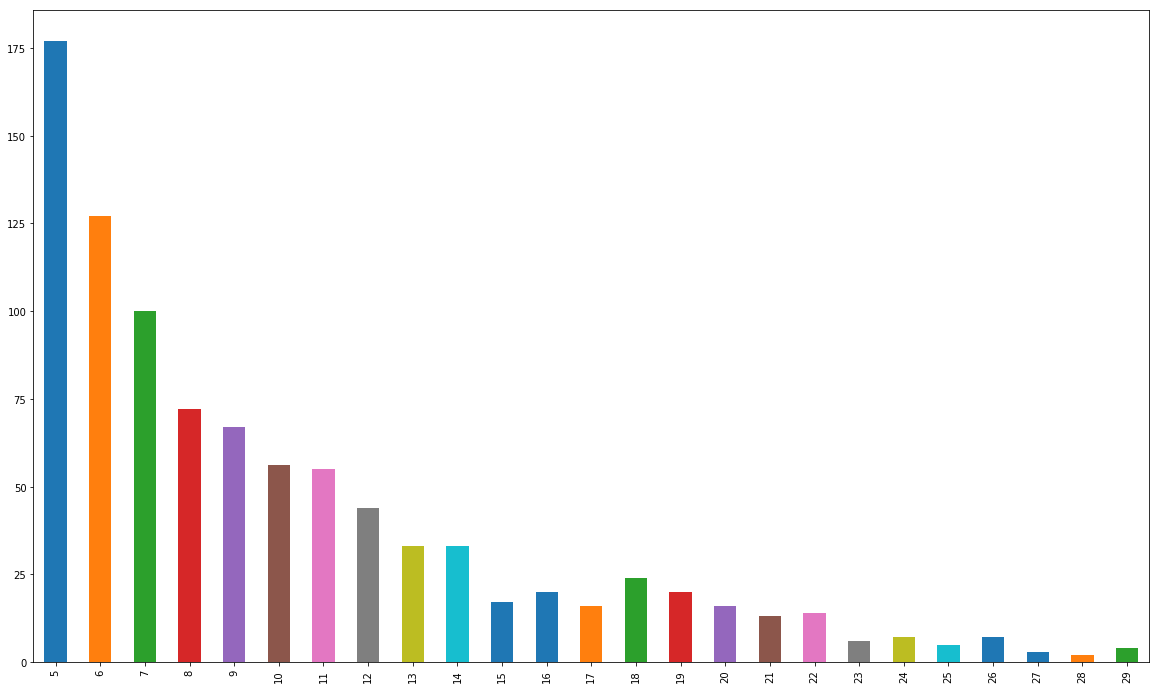

In [93]:
# Plotting distribution (x-axis is the Production Frequency value)
Freq = Newnew['Prod_Freq'].value_counts().sort_index()
#print Freq.sort_values()
Freq.plot('bar')

From the previous analysis I decided to weight each feature according to the following rules:

|Prod_Freq| Weight |
| ----- | ----- |
|28-30|5|
|21-27|4|
|15-20|3|
|10-14|2|
|5-9|1|

## Testing weighted HDC representations

Here we find the correlation between the similarity values obtained from the HDC weighted representations and the dataset.

In [94]:
%run EncodingDataset.ipynb

num_f = 30
mode = 'Prod_Freq'
# List of similarity values from dataset...
for i in range (3):
    print "\n\n"
    print i
    # Printing current mode
    print "Mode:", mode, "  Number of features:", num_f
    # Initialize memory
    Init_mem( mode, num_f, SimLex_names) 
    # Create list of distances
    HD_SimLex = []
    # Loop over all pairs of concepts
    for pair in SimLexList:
        HD_SimLex.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
        
#    pear_correlation= pearsonr(MEN_sim, HD_MEN)[0]
    spear_correlation= spearmanr(SimLex_sim, HD_SimLex)[0]
#    print "   Pearson's correlation value: ", pear_correlation
    print "   Spearman's correlation value: ", spear_correlation




0
Mode: Prod_Freq   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.6542853115308711



1
Mode: Prod_Freq   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.6544506323956516



2
Mode: Prod_Freq   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.6392500973063933


## Distribution of Inter_corr_tax values in MEN

Since we are going to weight features based on the Inter_corr_str_tax value we have to have an idea of how the values are distributed

In [95]:
df = pd.read_excel( pathh + 'CONCS_FEATS_concstats_brm.xlsx')

# Extracting only relevant columns (from concepts in MEN)
NewDF = df[df['Concept'].isin(SimLex_names)]
Newnew= NewDF[['Concept','Feature','Intercorr_Str_Tax']]
#Newnew

In [96]:
# Plotting distribution (x-axis is the Production Frequency value)
Newnew = Newnew.round()
Intercorr = Newnew['Intercorr_Str_Tax'].value_counts().sort_index()
print Intercorr

0.0      505
7.0       11
8.0       10
9.0       10
10.0       6
11.0      12
12.0       6
13.0       5
14.0      10
15.0       2
16.0      10
17.0       4
18.0       8
19.0       2
20.0       2
21.0       4
22.0       4
23.0       8
24.0       3
25.0       1
26.0       5
27.0       3
28.0       2
29.0       2
30.0       5
31.0       4
32.0       3
33.0       2
34.0       1
35.0       4
        ... 
164.0      2
167.0      1
171.0      1
172.0      1
176.0      3
180.0      2
184.0      2
186.0      1
187.0      1
188.0      1
191.0      1
197.0      1
202.0      1
207.0      2
210.0      2
213.0      1
216.0      1
231.0      3
235.0      1
240.0      1
249.0      1
259.0      1
266.0      1
283.0      1
285.0      1
290.0      1
296.0      1
297.0      1
319.0      1
320.0      1
Name: Intercorr_Str_Tax, Length: 164, dtype: int64


In [97]:
%run EncodingDataset.ipynb

num_f = 30
mode = 'Intercorr_str_tax'
# List of similarity values from dataset...
for i in range (3):
    print "\n\n"
    print i
    # Printing current mode
    print "Mode:", mode, "  Number of features:", num_f
    # Initialize memory
    Init_mem( mode, num_f, SimLex_names) 
    # Create list of distances
    HD_SimLex = []
    # Loop over all pairs of concepts
    for pair in SimLexList:
        HD_SimLex.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
        
#    pear_correlation= pearsonr(MEN_sim, HD_MEN)[0]
    spear_correlation= spearmanr(SimLex_sim, HD_SimLex)[0]
#    print "   Pearson's correlation value: ", pear_correlation
    print "   Spearman's correlation value: ", spear_correlation




0
Mode: Intercorr_str_tax   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.5962365227296158



1
Mode: Intercorr_str_tax   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.5982309620657846



2
Mode: Intercorr_str_tax   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.5979279738579267


## No_Tax....

In [98]:
%run EncodingDataset.ipynb

num_f = 30
mode = 'Intercorr_str_No_tax'
# List of similarity values from dataset...
for i in range (3):
    print "\n\n"
    print i
    # Printing current mode
    print "Mode:", mode, "  Number of features:", num_f
    # Initialize memory
    Init_mem( mode, num_f, SimLex_names) 
    # Create list of distances
    HD_SimLex = []
    # Loop over all pairs of concepts
    for pair in SimLexList:
        HD_SimLex.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
        
#    pear_correlation= pearsonr(MEN_sim, HD_MEN)[0]
    spear_correlation= spearmanr(SimLex_sim, HD_SimLex)[0]
#    print "   Pearson's correlation value: ", pear_correlation
    print "   Spearman's correlation value: ", spear_correlation




0
Mode: Intercorr_str_No_tax   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.6308630232623512



1
Mode: Intercorr_str_No_tax   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.6427740779971672



2
Mode: Intercorr_str_No_tax   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.6268235972999058


## Combining methods...

In [99]:
%run EncodingDataset.ipynb

num_f = 30
mode = 'Intercorr_PF'

for i in range (3):
    print "\n\n"
    print i
    # Printing current mode
    print "Mode:", mode, "  Number of features:", num_f
    # Initialize memory
    Init_mem( mode, num_f, SimLex_names) 
    # Create list of distances
    HD_SimLex = []
    # Loop over all pairs of concepts
    for pair in SimLexList:
        HD_SimLex.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
        
#    pear_correlation= pearsonr(MEN_sim, HD_MEN)[0]
    spear_correlation= spearmanr(SimLex_sim, HD_SimLex)[0]
#    print "   Pearson's correlation value: ", pear_correlation
    print "   Spearman's correlation value: ", spear_correlation




0
Mode: Intercorr_PF   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.6186482501797361



1
Mode: Intercorr_PF   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.663495084458918



2
Mode: Intercorr_PF   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.6507153444872983


### Combining with Intercorr_No_Tax... 

In [100]:
%run EncodingDataset.ipynb

num_f = 30
mode = 'Intercorr_NoT_PF'

for i in range (3):
    print "\n\n"
    print i
    # Printing current mode
    print "Mode:", mode, "  Number of features:", num_f
    # Initialize memory
    Init_mem( mode, num_f, SimLex_names) 
    # Create list of distances
    HD_SimLex = []
    # Loop over all pairs of concepts
    for pair in SimLexList:
        HD_SimLex.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
        
#    pear_correlation= pearsonr(MEN_sim, HD_MEN)[0]
    spear_correlation= spearmanr(SimLex_sim, HD_SimLex)[0]
#    print "   Pearson's correlation value: ", pear_correlation
    print "   Spearman's correlation value: ", spear_correlation




0
Mode: Intercorr_NoT_PF   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.6622735938640898



1
Mode: Intercorr_NoT_PF   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.6393205769202088



2
Mode: Intercorr_NoT_PF   Number of features: 30
Begining to encode dataset...
End of encoding
   Spearman's correlation value:  0.6342236959862662
